# Loading libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 200)

# Predicting House prices

In [39]:
# read data
data = pd.read_csv("DATA_Housing_Prices.csv")

## Preprocessing function

In [40]:
def preprocessing(df):
    '''
    Function to transform an input dataframe.
    It will add another column named "Antiquity"
    Drop all the Year related columns
    Drop any column not in
    ['Id',
   'OverallQual',
   'TotalBsmtSF',
   '1stFlrSF',
   'GrLivArea',
   'FullBath',
   'KitchenQual',
   'TotRmsAbvGrd',
   'GarageCars',
   'GarageArea',
   'Antiquity',
   'SalePrice']
    Replace values of variable KitchenQual to
    {'Fa': 1, 'TA': 1.61, 'Gd': 1.61, 'Ex': 3.14}
    Drop any row with 'LotArea' < 25000   
    Input: 
    df = Pandas DataFrame object
    Output:
    Transformed DataFrame
    '''
    df2 = df.copy()

    # Computing Antiquity
    df2['Antiquity'] = df2['YrSold'] - df2['YearRemodAdd']
    year_cols = ['YearBuilt', 'YearRemodAdd', 'YrSold']
    df2.drop(columns = year_cols, axis = 1, inplace = True)

    # Filtering by LotArea
    df2 = df2[df2['LotArea'] < 25000 ]

    # Droping unwanted columns
    cols_to_keep = [
   'OverallQual',
   'TotalBsmtSF',
   'GrLivArea',
   'FullBath',
   'KitchenQual',
   'GarageCars',
   'Antiquity',
   'SalePrice']
    df2 = df2[cols_to_keep]

    # Replacing KitchenQual values by numerical ones.
    df2['KitchenQual'] = df2['KitchenQual'].replace({'Fa': 1, 'TA': 1.61, 'Gd': 1.61, 'Ex': 3.14})

    return df2

## Model evaluation

In [41]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(np.exp(y_train)-np.exp(y_pred_train))
    ME_test  = np.mean(np.exp(y_test)-np.exp(y_pred_test))

    MAE_train = mean_absolute_error(np.exp(y_train),np.exp(y_pred_train))
    MAE_test  = mean_absolute_error(np.exp(y_test),np.exp(y_pred_test))

    MSE_train = mean_squared_error(np.exp(y_train),np.exp(y_pred_train))
    MSE_test  = mean_squared_error(np.exp(y_test),np.exp(y_pred_test))

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(np.exp(y_train)-np.exp(y_pred_train)) / np.exp(y_train))* 100.)
    MAPE_test  = np.mean((np.abs(np.exp(y_test)-np.exp(y_pred_test)) / np.exp(y_test))* 100.)

    R2_train = r2_score(np.exp(y_train),np.exp(y_pred_train))
    R2_test  = r2_score(np.exp(y_test),np.exp(y_pred_test))

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': np.exp(y_train), 'Predicted': np.exp(y_pred_train)})
    df_test  = pd.DataFrame({'Real': np.exp(y_test),  'Predicted': np.exp(y_pred_test)})

    return performance, df_train, df_test

## Creating our transformer

Check more information about pipelines [here](https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f)

In [42]:
from sklearn.preprocessing import FunctionTransformer

# FunctionTransformer creates a transformer from a user defined function
procTransformer = FunctionTransformer(preprocessing)

data = procTransformer.transform(data)
data

# data = preprocess(data)
# pipeline = Pipeline([('drop_columns',drop_cols_transformer),('standard_scaler',StandardScaler()),('Linear_model',LinearRegressor())])
# pipeline.fit(X_train,y_trains)
# pipeline.transform(X_train)
# pipeline.transform(X_test)
# pipeline.predict(X_train)
# pipeline.predict(X_test)

,OverallQual,TotalBsmtSF,GrLivArea,FullBath,KitchenQual,GarageCars,Antiquity,SalePrice
0,7,856,1710,2,1.61,2,5,208500
1,6,1262,1262,2,1.61,2,31,181500
2,7,920,1786,2,1.61,2,6,223500
3,7,756,1717,1,1.61,3,36,140000
4,8,1145,2198,2,1.61,3,8,250000
...,...,...,...,...,...,...,...,...
1455,6,953,1647,2,1.61,2,7,175000
1456,6,1542,2073,2,1.61,2,22,210000
1457,7,1152,2340,2,1.61,1,4,266500
1458,5,1078,1078,1,1.61,1,14,142125


In [43]:
##data2 = preprocessing(data)
##data2

## Defining X, y

In [44]:
# define X and y (features and target)
X = data.drop(columns=["SalePrice"], axis = 1)
y = np.log(data["SalePrice"])

### Data Splitting

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

### Modelling

In [46]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor # Import KNeighborsClassifier to use the K-NN for classification
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

trans = PowerTransformer()
model = LinearRegression()

# define X and y (features and target)
#X = data.drop(columns = ['Id','SalePrice'])
#y = np.log(data['SalePrice']) # The model will try to predict the log(SalePrice) instead of the real price

# data splitting
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# transforming data
trans.fit(X_train)

X_train = trans.transform(X_train)
X_test  = trans.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
model.fit(X_train, y_train)

y_pred_train_lm = model.predict(X_train)
y_pred_test_lm  = model.predict(X_test)

### Evaluating the model performance

In [49]:
performance_lm, _, _= model_performance(y_train, y_pred_train_lm, y_test, y_pred_test_lm)
performance_lm

,Error_metric,Train,Test
0,Mean error,2209.53,250.74
1,Mean absolute error,19392.50,19157.71
2,Mean squared error,784927920.32,699543977.46
3,Root mean squared error,28016.57,26448.89
4,Mean absolute percentual error,11.90,11.54
5,R2,0.87,0.88


### KNN

In [58]:
# initialize model (set parameters)
neigh = KNeighborsRegressor(n_neighbors=2) # n_neighbors = K

In [59]:
neigh.fit(X_train, y_train) # Minkowski distance with p = 2 -> Euclidean distance

KNeighborsRegressor(n_neighbors=2)

## Making predictions

In [60]:
# make predictions
y_pred_train_knn = neigh.predict(X_train)
y_pred_test_knn  = neigh.predict(X_test)

performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
performance_knn

,Error_metric,Train,Test
0,Mean error,754.13,-1607.59
1,Mean absolute error,13400.43,21690.35
2,Mean squared error,380086171.65,862019418.97
3,Root mean squared error,19495.80,29360.17
4,Mean absolute percentual error,7.89,13.18
5,R2,0.94,0.85


In [61]:
# for loop to try many values of k

full = pd.DataFrame()

models = {'k': [] }

for k in range(2,21):

    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)

    models['k'] = [k, neigh]

    y_pred_train_knn = neigh.predict(X_train)
    y_pred_test_knn  = neigh.predict(X_test)

    performance_knn, _, _ = model_performance(y_train, y_pred_train_knn, y_test, y_pred_test_knn)
    temp = pd.DataFrame({'k': [k]*6, 'Error_metric': performance_knn['Error_metric'], 
                         'Train': performance_knn['Train'], 'Test': performance_knn['Test']})
    full = pd.concat([full,temp], axis=0)

full

,k,Error_metric,Train,Test
0,2,Mean error,754.13,-1607.59
1,2,Mean absolute error,13400.43,21690.35
2,2,Mean squared error,380086171.65,862019418.97
3,2,Root mean squared error,19495.80,29360.17
4,2,Mean absolute percentual error,7.89,13.18
5,2,R2,0.94,0.85
0,3,Mean error,1597.35,-1702.95
1,3,Mean absolute error,15533.08,22045.58
2,3,Mean squared error,527840706.96,937464965.84
3,3,Root mean squared error,22974.78,30618.05


## Checking for overfitting

In [62]:
full[full['Error_metric'] == 'R2']

,k,Error_metric,Train,Test
5,2,R2,0.94,0.85
5,3,R2,0.91,0.84
5,4,R2,0.90,0.85
5,5,R2,0.89,0.85
5,6,R2,0.88,0.86
5,7,R2,0.87,0.86
5,8,R2,0.87,0.87
5,9,R2,0.87,0.87
5,10,R2,0.86,0.87
5,11,R2,0.86,0.86


In [32]:
full2 = full.melt(id_vars=['k','Error_metric'])
full2

,k,Error_metric,variable,value
0,2,Mean error,Train,754.13
1,2,Mean absolute error,Train,13400.43
2,2,Mean squared error,Train,380086171.65
3,2,Root mean squared error,Train,19495.80
4,2,Mean absolute percentual error,Train,7.89
...,...,...,...,...
223,20,Mean absolute error,Test,20751.24
224,20,Mean squared error,Test,860867886.07
225,20,Root mean squared error,Test,29340.55
226,20,Mean absolute percentual error,Test,12.31


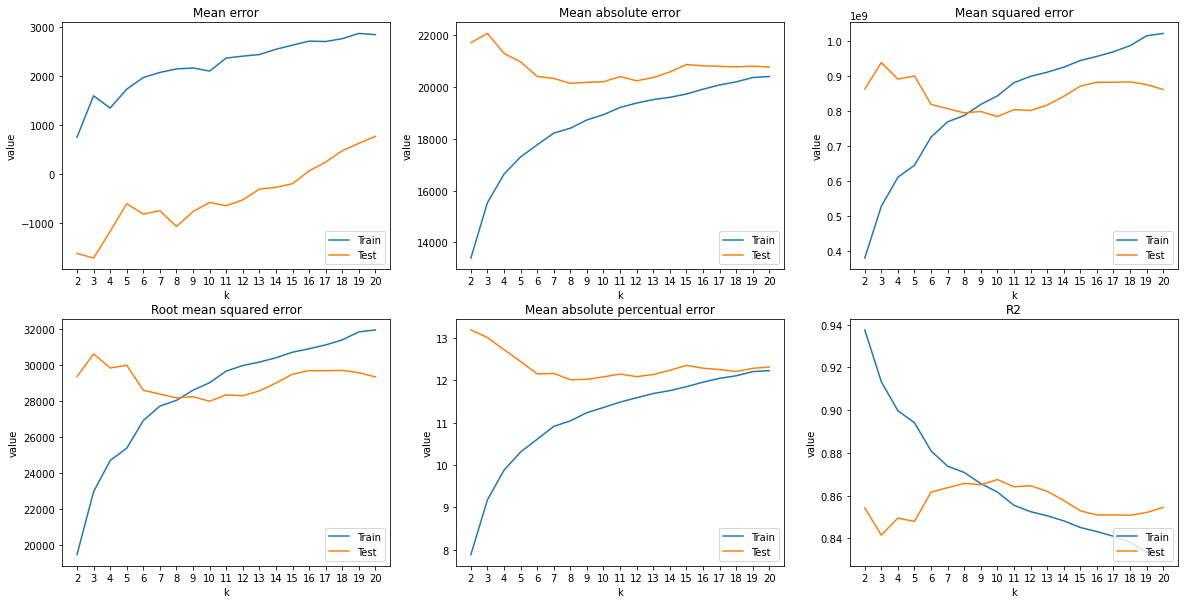

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')

## Part 2

### Cross Validation

In [ ]:
cross_val_score()

In [27]:
from sklearn.model_selection import GridSearchCV # RandomSearchCV

# initialize model (no parameters)
neigh = KNeighborsRegressor()

# define grid search
neigh_search = GridSearchCV(estimator=neigh,
                            param_grid={"n_neighbors":range(2,21),
                                        "weights":["uniform", "distance"]},
                            scoring="r2",
                            cv=10) # K-Fold cross validation -> cv = K-Folds

# all possible metrics here:
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())

In [28]:
neigh_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [29]:
neigh_search.cv_results_["mean_test_score"]

array([0.76111037, 0.7626098 , 0.79070373, 0.78986448, 0.79988256,
       0.80149052, 0.80399135, 0.80723542, 0.8058595 , 0.81018359,
       0.80922156, 0.81381507, 0.80797793, 0.81389322, 0.80945383,
       0.81584234, 0.81031702, 0.81663357, 0.80812185, 0.81539461,
       0.80584524, 0.81389895, 0.80526967, 0.81359053, 0.80419671,
       0.8132828 , 0.80225595, 0.81186091, 0.80147609, 0.81184502,
       0.80025089, 0.81128475, 0.79926441, 0.81063048, 0.79819649,
       0.81024316, 0.79619574, 0.8088419 ])

In [30]:
neigh_search.cv_results_["params"]

[{'n_neighbors': 2, 'weights': 'uniform'},
 {'n_neighbors': 2, 'weights': 'distance'},
 {'n_neighbors': 3, 'weights': 'uniform'},
 {'n_neighbors': 3, 'weights': 'distance'},
 {'n_neighbors': 4, 'weights': 'uniform'},
 {'n_neighbors': 4, 'weights': 'distance'},
 {'n_neighbors': 5, 'weights': 'uniform'},
 {'n_neighbors': 5, 'weights': 'distance'},
 {'n_neighbors': 6, 'weights': 'uniform'},
 {'n_neighbors': 6, 'weights': 'distance'},
 {'n_neighbors': 7, 'weights': 'uniform'},
 {'n_neighbors': 7, 'weights': 'distance'},
 {'n_neighbors': 8, 'weights': 'uniform'},
 {'n_neighbors': 8, 'weights': 'distance'},
 {'n_neighbors': 9, 'weights': 'uniform'},
 {'n_neighbors': 9, 'weights': 'distance'},
 {'n_neighbors': 10, 'weights': 'uniform'},
 {'n_neighbors': 10, 'weights': 'distance'},
 {'n_neighbors': 11, 'weights': 'uniform'},
 {'n_neighbors': 11, 'weights': 'distance'},
 {'n_neighbors': 12, 'weights': 'uniform'},
 {'n_neighbors': 12, 'weights': 'distance'},
 {'n_neighbors': 13, 'weights': 'unif

In [31]:
cv_res = neigh_search.cv_results_
sorted(zip(cv_res["mean_test_score"], cv_res["params"]), reverse=True)

[(0.8166335722584795, {'n_neighbors': 10, 'weights': 'distance'}),
 (0.815842340892018, {'n_neighbors': 9, 'weights': 'distance'}),
 (0.8153946128683328, {'n_neighbors': 11, 'weights': 'distance'}),
 (0.8138989532169513, {'n_neighbors': 12, 'weights': 'distance'}),
 (0.813893224709344, {'n_neighbors': 8, 'weights': 'distance'}),
 (0.8138150663132115, {'n_neighbors': 7, 'weights': 'distance'}),
 (0.8135905341108657, {'n_neighbors': 13, 'weights': 'distance'}),
 (0.8132828011590535, {'n_neighbors': 14, 'weights': 'distance'}),
 (0.8118609145644264, {'n_neighbors': 15, 'weights': 'distance'}),
 (0.8118450229260998, {'n_neighbors': 16, 'weights': 'distance'}),
 (0.8112847542975146, {'n_neighbors': 17, 'weights': 'distance'}),
 (0.810630483566966, {'n_neighbors': 18, 'weights': 'distance'}),
 (0.810317022722138, {'n_neighbors': 10, 'weights': 'uniform'}),
 (0.8102431579189234, {'n_neighbors': 19, 'weights': 'distance'}),
 (0.8101835937589715, {'n_neighbors': 6, 'weights': 'distance'}),
 (0.

#### Randomized search

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
param_distributions = {"n_neighbors":range(2,21),
                       "weights":["distance", "uniform"]}
# 20 K values * 2 possible wights = 40 combinations
# 100 combinations

In [34]:
neigh_randsearch = RandomizedSearchCV(estimator=neigh,
                                      param_distributions=param_distributions,
                                      n_iter=40,
                                      scoring="r2",
                                      cv=10)

In [35]:
neigh_randsearch.fit(X_train, y_train)

/opt/anaconda3/envs/DA_Env/lib/python3.9/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 38 is smaller than n_iter=40. Running 38 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=40,
                   param_distributions={'n_neighbors': range(2, 21),
                                        'weights': ['distance', 'uniform']},
                   scoring='r2')

In [36]:
cv_res = neigh_randsearch.cv_results_
sorted(zip(cv_res["mean_test_score"], cv_res["params"]), reverse=True)

[(0.8166335722584795, {'weights': 'distance', 'n_neighbors': 10}),
 (0.815842340892018, {'weights': 'distance', 'n_neighbors': 9}),
 (0.8153946128683328, {'weights': 'distance', 'n_neighbors': 11}),
 (0.8138989532169513, {'weights': 'distance', 'n_neighbors': 12}),
 (0.813893224709344, {'weights': 'distance', 'n_neighbors': 8}),
 (0.8138150663132115, {'weights': 'distance', 'n_neighbors': 7}),
 (0.8135905341108657, {'weights': 'distance', 'n_neighbors': 13}),
 (0.8132828011590535, {'weights': 'distance', 'n_neighbors': 14}),
 (0.8118609145644264, {'weights': 'distance', 'n_neighbors': 15}),
 (0.8118450229260998, {'weights': 'distance', 'n_neighbors': 16}),
 (0.8112847542975146, {'weights': 'distance', 'n_neighbors': 17}),
 (0.810630483566966, {'weights': 'distance', 'n_neighbors': 18}),
 (0.810317022722138, {'weights': 'uniform', 'n_neighbors': 10}),
 (0.8102431579189234, {'weights': 'distance', 'n_neighbors': 19}),
 (0.8101835937589715, {'weights': 'distance', 'n_neighbors': 6}),
 (0.